### Практика 05. Библиотека Pandas. Таблицы в Pandas

In [132]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import str

### 1. Создание датафрейма

**Задание.** Создайте датафрейм с информацией о странах и их столицах.

In [9]:
data_countries = [
    ['Исландия', 'Рейкьявик', 45464575475.0, 546.399],
    ['Норвегия', 'Осло', 436346734646.0, 7547.155],
    ['Швеция', 'Стокгольм', 56876967949.0, 3243.234],
    ['Нидерланды', 'Амстердам', 2442142142.0, 878.121],
    ['Швейцария','Берн', 29182174204.0, 432.322]
]

In [10]:
geography = ['country', 'capital', 'population', 'area']

In [11]:
mini_map = pd.DataFrame(data = data_countries, columns = geography)
mini_map

,country,capital,population,area
0,Исландия,Рейкьявик,4.546458e+10,546.399
1,Норвегия,Осло,4.363467e+11,7547.155
2,Швеция,Стокгольм,5.687697e+10,3243.234
3,Нидерланды,Амстердам,2.442142e+09,878.121
4,Швейцария,Берн,2.918217e+10,432.322


### 2. Извлечение и обзор данных 

Сброс ограничений на количество выводимых столбцов.

In [12]:
pd.set_option('display.max_columns', None)

Установка единообразного отображения вещественных чисел с двумя знаками после запятой.

In [13]:
pd.set_option('display.float_format', '{:,.2f}'.format)

Знакомство с данными, вывод первых строк датафрейма.

In [14]:
# проверка на целостность
mini_map.head()

,country,capital,population,area
0,Исландия,Рейкьявик,"45,464,575,475.00",546.40
1,Норвегия,Осло,"436,346,734,646.00","7,547.15"
2,Швеция,Стокгольм,"56,876,967,949.00","3,243.23"
3,Нидерланды,Амстердам,"2,442,142,142.00",878.12
4,Швейцария,Берн,"29,182,174,204.00",432.32


Знакомство с данными, вывод первых десяти строк датафрейма.

In [15]:
mini_map.head(2)

,country,capital,population,area
0,Исландия,Рейкьявик,"45,464,575,475.00",546.40
1,Норвегия,Осло,"436,346,734,646.00","7,547.15"


Знакомство с данными, вывод последних строк датафрейма.

In [16]:
mini_map.tail(2)

,country,capital,population,area
3,Нидерланды,Амстердам,"2,442,142,142.00",878.12
4,Швейцария,Берн,"29,182,174,204.00",432.32


Знакомство с данными, вывод случайной выборки из датафрейма.

In [17]:
mini_map.sample(3)

,country,capital,population,area
0,Исландия,Рейкьявик,"45,464,575,475.00",546.40
4,Швейцария,Берн,"29,182,174,204.00",432.32
3,Нидерланды,Амстердам,"2,442,142,142.00",878.12


Знакомство с атрибутами датафрейма. Изучение общей информации о датафрейме, структуры данных.

In [18]:
mini_map.dtypes

country        object
capital        object
population    float64
area          float64
dtype: object

In [19]:
mini_map.columns

Index(['country', 'capital', 'population', 'area'], dtype='object')

In [20]:
# (строки, столбцы)
mini_map.shape

(5, 4)

In [21]:
rows_number = mini_map.shape[0]
rows_number

5

In [22]:
columns_number = mini_map.shape[1]
columns_number

4

In [23]:
mini_map.info

<bound method DataFrame.info of       country    capital         population     area
0    Исландия  Рейкьявик  45,464,575,475.00   546.40
1    Норвегия       Осло 436,346,734,646.00 7,547.15
2      Швеция  Стокгольм  56,876,967,949.00 3,243.23
3  Нидерланды  Амстердам   2,442,142,142.00   878.12
4   Швейцария       Берн  29,182,174,204.00   432.32>

In [24]:
mini_map.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     5 non-null      object 
 1   capital     5 non-null      object 
 2   population  5 non-null      float64
 3   area        5 non-null      float64
dtypes: float64(2), object(2)
memory usage: 292.0+ bytes


### 3. Предварительные выводы о данных

Согласно документации к данным.

Датасет **_** содержит информацию _.<br>


Выводы<br><br>
1. В датафрейме **_ записей, _ столбцов**.
2. В _ столбцах имеются **пропущенные значения**.
3. Нарушение стиля в заголовке столбца **_**, следует изменить регистр.
4. Для ряда столбцов видится возможным **изменение типа данных** для снижения нагрузки и удобства визуализации данных (отсутствия дробных частей в лейблах/подписях).
5. Из столбца **_** для более детального анализа данных следует выделить месяц/год.
6. В столбцах **_**, **_**, **_**, **_** возможны дубликаты.
7. Более детально необходимо посмотреть на строковые значения в столбцах **_** (в некоторых наименованиях в конце строки - лишний символ точки); **_** (использование различных символов для разделения нескольких стран); в столбце **_** различается принцип ввода имен собственных для иностранных и отечественных режиссеров, аналогичная ситуация со столбцом **_**.
8. ...

### 4. Работа с датафреймом

In [25]:
mini_map.rename(columns = {'capital': 'city'}, inplace = True)
mini_map.rename(columns = {'area': 'area_kv_km'}, inplace = True)

In [26]:
mini_map.dtypes

country        object
city           object
population    float64
area_kv_km    float64
dtype: object

In [27]:
mini_map.population = mini_map.population.astype('int')

In [28]:
mini_map.dtypes

country        object
city           object
population      int64
area_kv_km    float64
dtype: object

In [29]:
mini_map = mini_map.astype({'population': 'float', 'area_kv_km': 'int'})
mini_map = mini_map.astype({'population': 'int', 'area_kv_km': 'float'})

In [30]:
mini_map

,country,city,population,area_kv_km
0,Исландия,Рейкьявик,45464575475,546.00
1,Норвегия,Осло,436346734646,"7,547.00"
2,Швеция,Стокгольм,56876967949,"3,243.00"
3,Нидерланды,Амстердам,2442142142,878.00
4,Швейцария,Берн,29182174204,432.00


In [31]:
mini_map.select_dtypes(include = ['int64', 'float64'])

,population,area_kv_km
0,45464575475,546.00
1,436346734646,"7,547.00"
2,56876967949,"3,243.00"
3,2442142142,878.00
4,29182174204,432.00


In [32]:
mini_map.select_dtypes(exclude = ['int64', 'float64'])

,country,city
0,Исландия,Рейкьявик
1,Норвегия,Осло
2,Швеция,Стокгольм
3,Нидерланды,Амстердам
4,Швейцария,Берн


In [33]:
mini_map

,country,city,population,area_kv_km
0,Исландия,Рейкьявик,45464575475,546.00
1,Норвегия,Осло,436346734646,"7,547.00"
2,Швеция,Стокгольм,56876967949,"3,243.00"
3,Нидерланды,Амстердам,2442142142,878.00
4,Швейцария,Берн,29182174204,432.00


In [34]:
# добавление значений(строк)
dict = {'country': 'Belgium', 'city': 'Brussel', 'population': 4354643, 'area_kv_km': 123.6}

In [35]:
# mini_map = mini_map.append(dict, ignore_index = True)

In [36]:
mini_map['pop_density'] = [32, 2433, 536, 577, 968]

In [37]:
mini_map

,country,city,population,area_kv_km,pop_density
0,Исландия,Рейкьявик,45464575475,546.00,32
1,Норвегия,Осло,436346734646,"7,547.00",2433
2,Швеция,Стокгольм,56876967949,"3,243.00",536
3,Нидерланды,Амстердам,2442142142,878.00,577
4,Швейцария,Берн,29182174204,432.00,968


In [38]:
mini_map = mini_map.assign(area_miles = mini_map.area_kv_km / 1.61).round(2)

In [39]:
mini_map

,country,city,population,area_kv_km,pop_density,area_miles
0,Исландия,Рейкьявик,45464575475,546.00,32,339.13
1,Норвегия,Осло,436346734646,"7,547.00",2433,"4,687.58"
2,Швеция,Стокгольм,56876967949,"3,243.00",536,"2,014.29"
3,Нидерланды,Амстердам,2442142142,878.00,577,545.34
4,Швейцария,Берн,29182174204,432.00,968,268.32


In [40]:
# axis = 1 - столбцы
# axis = 0 - строки
mini_map.drop(labels = 'area_miles', axis = 1, inplace = True)
mini_map

,country,city,population,area_kv_km,pop_density
0,Исландия,Рейкьявик,45464575475,546.00,32
1,Норвегия,Осло,436346734646,"7,547.00",2433
2,Швеция,Стокгольм,56876967949,"3,243.00",536
3,Нидерланды,Амстердам,2442142142,878.00,577
4,Швейцария,Берн,29182174204,432.00,968


In [41]:
mini_map.drop(labels = [0, 1], axis = 0) 

,country,city,population,area_kv_km,pop_density
2,Швеция,Стокгольм,56876967949,"3,243.00",536
3,Нидерланды,Амстердам,2442142142,878.00,577
4,Швейцария,Берн,29182174204,432.00,968


# Индексация в DataFrame

### 5. Индексация по координатам

**Задание.** Выполните поиск данных в датафрейме с помощью индексации по координатам.

Содержимое ячейки из пятой строки, колонки 'title'. Доступ к индексации открывает атрибут **loc[строка, столбец]**.

In [42]:
# сначала указывается строка, потом столбец
mini_map.loc[4, 'city']

'Берн'

Содержимое конкретной строки.

In [43]:
mini_map.loc[4]

country          Швейцария
city                  Берн
population     29182174204
area_kv_km          432.00
pop_density            968
Name: 4, dtype: object

In [44]:
mini_map.loc[2:3]

,country,city,population,area_kv_km,pop_density
2,Швеция,Стокгольм,56876967949,"3,243.00",536
3,Нидерланды,Амстердам,2442142142,878.00,577


Содержимое нескольких строк внутри датафрейма (**среза строк**).

In [45]:
mini_map

,country,city,population,area_kv_km,pop_density
0,Исландия,Рейкьявик,45464575475,546.00,32
1,Норвегия,Осло,436346734646,"7,547.00",2433
2,Швеция,Стокгольм,56876967949,"3,243.00",536
3,Нидерланды,Амстердам,2442142142,878.00,577
4,Швейцария,Берн,29182174204,432.00,968


Содержимое последних трех строк.

In [46]:
mini_map.loc[:1]

,country,city,population,area_kv_km,pop_density
0,Исландия,Рейкьявик,45464575475,546.00,32
1,Норвегия,Осло,436346734646,"7,547.00",2433


**Что не так с данными? Верно ли получен результат?**

Содержимое нескольких строк внутри датафрейма и конкретного столбца.

In [47]:
mini_map.loc[1:4, 'city']

1         Осло
2    Стокгольм
3    Амстердам
4         Берн
Name: city, dtype: object

Содержимое конкретного столбца.

In [48]:
mini_map.loc[:, 'city']

0    Рейкьявик
1         Осло
2    Стокгольм
3    Амстердам
4         Берн
Name: city, dtype: object

Содержимое конкретных столбцов.

In [49]:
mini_map.loc[:, ['city']]

,city
0,Рейкьявик
1,Осло
2,Стокгольм
3,Амстердам
4,Берн


Содержимое среза нескольких столбцов.

In [50]:
mini_map.loc[:, 'city':'area_kv_km'] 

,city,population,area_kv_km
0,Рейкьявик,45464575475,546.00
1,Осло,436346734646,"7,547.00"
2,Стокгольм,56876967949,"3,243.00"
3,Амстердам,2442142142,878.00
4,Берн,29182174204,432.00


**Примеры индексации**

| Данные                            | Индексация                     |
|-----------------------------------|--------------------------------|
| Одна ячейка                       | .loc[7, 'genre']               |
| Один столбец                      | .loc[:, 'genre']               |
| Несколько столбцов                | .loc[:, ['genre', 'artist']]   |
| Несколько столбцов подряд (срез)  | .loc[:, 'total play': 'genre'] |
| Одна строка                       | .loc[1]                        |
| Все строки, начиная с заданной    | .loc[1:]                       |
| Все строки до заданной            | .loc[:3]                       |
| Несколько строк подряд (срез)     | .loc[2:5]                      |

# Задание
Используйте все представленные в таблице варианты индексации и выведите результаты срезов (*используйте собственные примеры*).

In [51]:
mini_map

,country,city,population,area_kv_km,pop_density
0,Исландия,Рейкьявик,45464575475,546.00,32
1,Норвегия,Осло,436346734646,"7,547.00",2433
2,Швеция,Стокгольм,56876967949,"3,243.00",536
3,Нидерланды,Амстердам,2442142142,878.00,577
4,Швейцария,Берн,29182174204,432.00,968


In [52]:
# получение одной ячейки

mini_map.loc[2, 'city']

'Стокгольм'

In [53]:
# срез столбца
mini_map.loc[:, 'city']

0    Рейкьявик
1         Осло
2    Стокгольм
3    Амстердам
4         Берн
Name: city, dtype: object

In [54]:
# срез нескольких столбцов по их названиям
mini_map.loc[:,['country', 'area_kv_km']]

,country,area_kv_km
0,Исландия,546.00
1,Норвегия,"7,547.00"
2,Швеция,"3,243.00"
3,Нидерланды,878.00
4,Швейцария,432.00


In [55]:
# срез нескольких столбцов от одного до другого
mini_map.loc[:, 'population' : 'pop_density']

,population,area_kv_km,pop_density
0,45464575475,546.00,32
1,436346734646,"7,547.00",2433
2,56876967949,"3,243.00",536
3,2442142142,878.00,577
4,29182174204,432.00,968


In [56]:
# одна строка
mini_map.loc[3]

country        Нидерланды
city            Амстердам
population     2442142142
area_kv_km         878.00
pop_density           577
Name: 3, dtype: object

In [57]:
# срез всех строк, начиная с заданной
mini_map.loc[3:]

,country,city,population,area_kv_km,pop_density
3,Нидерланды,Амстердам,2442142142,878.00,577
4,Швейцария,Берн,29182174204,432.00,968


In [58]:
# срез всех строк до заданной
mini_map.loc[:3]

,country,city,population,area_kv_km,pop_density
0,Исландия,Рейкьявик,45464575475,546.00,32
1,Норвегия,Осло,436346734646,"7,547.00",2433
2,Швеция,Стокгольм,56876967949,"3,243.00",536
3,Нидерланды,Амстердам,2442142142,878.00,577


In [59]:
# срез нескольких строк подряд
mini_map.loc[0:3]

,country,city,population,area_kv_km,pop_density
0,Исландия,Рейкьявик,45464575475,546.00,32
1,Норвегия,Осло,436346734646,"7,547.00",2433
2,Швеция,Стокгольм,56876967949,"3,243.00",536
3,Нидерланды,Амстердам,2442142142,878.00,577


**Срезы по номерам строк и списки столбцов можно сочетать**

| Данные                                                          | Индексация                          |
|-----------------------------------------------------------------|-------------------------------------|
| Срез строк в заданном диапазоне и выбор определённого столбца   | .loc[2:10, 'genre']                 |
| Срез нескольких столбцов подряд и выбор определённой строки     | .loc[5, 'total play': 'genre']      |
| Выбор заданных столбцов и определённой строки                   | .loc[10, ['total play', 'artist']]  |
| Выбор заданных столбцов и срез нескольких строк подряд          | .loc[7:10, ['total play', 'genre']] |

# Задание
Используйте все представленные в таблице варианты индексации и выведите результаты срезов (*используйте собственные примеры*).

In [60]:
#срез строк в заданном диапазоне и выбор определённого столбца
mini_map.loc[0:4, 'country']

0      Исландия
1      Норвегия
2        Швеция
3    Нидерланды
4     Швейцария
Name: country, dtype: object

In [61]:
#срез нескольких столбцов подряд и выбор определённой строки
mini_map.loc[2, 'country': 'city']

country       Швеция
city       Стокгольм
Name: 2, dtype: object

In [62]:
#выбор заданных столбцов и определённой строки
mini_map.loc[4, ['country','population']]

country         Швейцария
population    29182174204
Name: 4, dtype: object

In [63]:
#выбор заданных столбцов и срез нескольких строк подряд
mini_map.loc[0:3, ['country', 'area_kv_km']]

,country,area_kv_km
0,Исландия,546.00
1,Норвегия,"7,547.00"
2,Швеция,"3,243.00"
3,Нидерланды,878.00


**Сокращённая запись при индексации**<br>
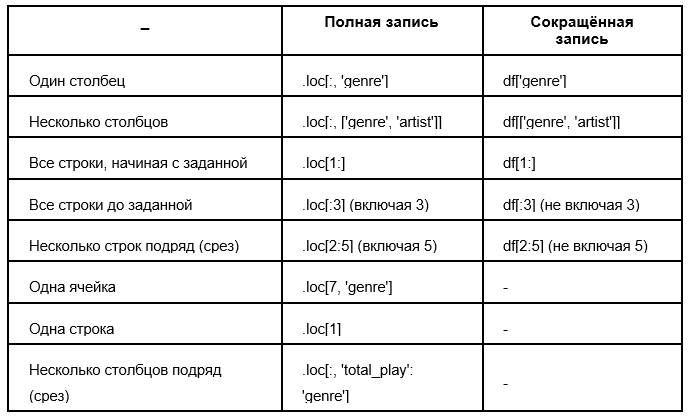

# Задание
Перепишите срезы из заданий 6-7 в сокращенном виде (там, где это возможно).

In [74]:
# срез столбца
mini_map['city']

0    Рейкьявик
1         Осло
2    Стокгольм
3    Амстердам
4         Берн
Name: city, dtype: object

In [80]:
# срез нескольких столбцов по их названиям
mini_map[['country', 'area_kv_km']]

,country,area_kv_km
0,Исландия,546.00
1,Норвегия,"7,547.00"
2,Швеция,"3,243.00"
3,Нидерланды,878.00
4,Швейцария,432.00


In [81]:
# срез всех строк, начиная с заданной
mini_map[3:]

,country,city,population,area_kv_km,pop_density
3,Нидерланды,Амстердам,2442142142,878.00,577
4,Швейцария,Берн,29182174204,432.00,968


In [79]:
# срез всех строк до заданной
mini_map[:3]

,country,city,population,area_kv_km,pop_density
0,Исландия,Рейкьявик,45464575475,546.00,32
1,Норвегия,Осло,436346734646,"7,547.00",2433
2,Швеция,Стокгольм,56876967949,"3,243.00",536


In [82]:
# срез нескольких строк подряд
mini_map[0:3]

,country,city,population,area_kv_km,pop_density
0,Исландия,Рейкьявик,45464575475,546.00,32
1,Норвегия,Осло,436346734646,"7,547.00",2433
2,Швеция,Стокгольм,56876967949,"3,243.00",536


### 6. Логическая индексация

In [83]:
mini_map

,country,city,population,area_kv_km,pop_density
0,Исландия,Рейкьявик,45464575475,546.00,32
1,Норвегия,Осло,436346734646,"7,547.00",2433
2,Швеция,Стокгольм,56876967949,"3,243.00",536
3,Нидерланды,Амстердам,2442142142,878.00,577
4,Швейцария,Берн,29182174204,432.00,968


In [70]:
mini_map.loc[mini_map.loc[:, 'city'] == 'Берн']

,country,city,population,area_kv_km,pop_density
4,Швейцария,Берн,29182174204,432.00,968


In [71]:
mini_map.loc[mini_map.loc[:, 'city'] == 'Берн'][['country', 'city']]

,country,city
4,Швейцария,Берн


In [72]:
mini_map.loc[mini_map.loc[:, 'population'] > 2442142142]

,country,city,population,area_kv_km,pop_density
0,Исландия,Рейкьявик,45464575475,546.00,32
1,Норвегия,Осло,436346734646,"7,547.00",2433
2,Швеция,Стокгольм,56876967949,"3,243.00",536
4,Швейцария,Берн,29182174204,432.00,968


In [73]:
mini_map.loc[mini_map.loc[:, 'population'] > 2442142142]['population'].count()

np.int64(4)

# Задание
Выполните поиск данных в датафрейме с помощью логической индексации (не менее 4ех различных условий).

In [91]:
mini_map

,country,city,population,area_kv_km,pop_density
0,Исландия,Рейкьявик,45464575475,546.00,32
1,Норвегия,Осло,436346734646,"7,547.00",2433
2,Швеция,Стокгольм,56876967949,"3,243.00",536
3,Нидерланды,Амстердам,2442142142,878.00,577
4,Швейцария,Берн,29182174204,432.00,968


In [89]:
mini_map.loc[mini_map.loc[:, 'city'] == 'Осло']

,country,city,population,area_kv_km,pop_density
1,Норвегия,Осло,436346734646,"7,547.00",2433


In [90]:
mini_map.loc[mini_map.loc[:, 'country'] == 'Нидерланды'][['country', 'city', 'area_kv_km']]

,country,city,area_kv_km
3,Нидерланды,Амстердам,878.00


In [93]:
mini_map.loc[mini_map.loc[:, 'pop_density'] > 536]['population'].count()

np.int64(3)

In [94]:
mini_map.loc[mini_map.loc[:, 'area_kv_km'] > 432]

,country,city,population,area_kv_km,pop_density
0,Исландия,Рейкьявик,45464575475,546.00,32
1,Норвегия,Осло,436346734646,"7,547.00",2433
2,Швеция,Стокгольм,56876967949,"3,243.00",536
3,Нидерланды,Амстердам,2442142142,878.00,577


**Сокращенные** записи

In [104]:
mini_map[mini_map['city'] == 'Осло']

,country,city,population,area_kv_km,pop_density
1,Норвегия,Осло,436346734646,"7,547.00",2433


In [105]:
mini_map[mini_map['country'] == 'Нидерланды'][['country', 'city', 'area_kv_km']]

,country,city,area_kv_km
3,Нидерланды,Амстердам,878.00


In [106]:
mini_map[mini_map['pop_density'] > 536]['population'].count()

np.int64(3)

In [107]:
mini_map[mini_map['area_kv_km'] > 432]

,country,city,population,area_kv_km,pop_density
0,Исландия,Рейкьявик,45464575475,546.00,32
1,Норвегия,Осло,436346734646,"7,547.00",2433
2,Швеция,Стокгольм,56876967949,"3,243.00",536
3,Нидерланды,Амстердам,2442142142,878.00,577


**В логической индексации можно использовать логические выражения с любыми логическими операциями: ==,  !=, >, <, >=, <=**, а также функции-предикаты, которые возвращают логическое значение. 

In [111]:
mini_map[mini_map['area_kv_km'] % 2 == 0]

,country,city,population,area_kv_km,pop_density
0,Исландия,Рейкьявик,45464575475,546.00,32
3,Нидерланды,Амстердам,2442142142,878.00,577
4,Швейцария,Берн,29182174204,432.00,968


In [113]:
mini_map[mini_map['population'] >= mini_map['population'].median()]


,country,city,population,area_kv_km,pop_density
0,Исландия,Рейкьявик,45464575475,546.00,32
1,Норвегия,Осло,436346734646,"7,547.00",2433
2,Швеция,Стокгольм,56876967949,"3,243.00",536


In [120]:
mini_map[(mini_map['pop_density'] >= 20) & (mini_map['pop_density'] <= 40)]


,country,city,population,area_kv_km,pop_density
0,Исландия,Рейкьявик,45464575475,546.00,32


**Чтобы применить несколько условий для фильтрации**, сначала примените первое условие и сохраните результат. Затем вызовите логическую индексацию со вторым условием.

In [122]:
uslovie_1 = mini_map['pop_density'] >= 300
uslovie_2 = mini_map['area_kv_km'] <= 900

result = mini_map[uslovie_1 & uslovie_2]
result

,country,city,population,area_kv_km,pop_density
3,Нидерланды,Амстердам,2442142142,878.00,577
4,Швейцария,Берн,29182174204,432.00,968


# Задание
Продумайте и выполните поиск данных в датафрейме с помощью логической индексации:
- 2 фильтра на поиск по столбцу со строковыми значениями
- 2 фильтра на поиск по столбцу с числовыми значениями
- 2 фильтра на поиск по нескольким условиями
Убедитесь, что все фильтры - рабочие.<br>
**!! Используйте все логические операции: ==, !=, >, <, >=, <=**

In [123]:
mini_map

,country,city,population,area_kv_km,pop_density
0,Исландия,Рейкьявик,45464575475,546.00,32
1,Норвегия,Осло,436346734646,"7,547.00",2433
2,Швеция,Стокгольм,56876967949,"3,243.00",536
3,Нидерланды,Амстердам,2442142142,878.00,577
4,Швейцария,Берн,29182174204,432.00,968


In [135]:
filter_1 = mini_map['country'].str.startswith('Ш')
mini_map[filter_1]

,country,city,population,area_kv_km,pop_density
2,Швеция,Стокгольм,56876967949,"3,243.00",536
4,Швейцария,Берн,29182174204,432.00,968


In [136]:
filter_2 = mini_map['city'] != 'Осло'
mini_map[filter_2]

,country,city,population,area_kv_km,pop_density
0,Исландия,Рейкьявик,45464575475,546.00,32
2,Швеция,Стокгольм,56876967949,"3,243.00",536
3,Нидерланды,Амстердам,2442142142,878.00,577
4,Швейцария,Берн,29182174204,432.00,968


In [137]:
filter_3 = mini_map['pop_density'] > 500
mini_map[filter_3]

,country,city,population,area_kv_km,pop_density
1,Норвегия,Осло,436346734646,"7,547.00",2433
2,Швеция,Стокгольм,56876967949,"3,243.00",536
3,Нидерланды,Амстердам,2442142142,878.00,577
4,Швейцария,Берн,29182174204,432.00,968


In [138]:
filter_4 = mini_map['area_kv_km'] < 1000
mini_map[filter_4]

,country,city,population,area_kv_km,pop_density
0,Исландия,Рейкьявик,45464575475,546.00,32
3,Нидерланды,Амстердам,2442142142,878.00,577
4,Швейцария,Берн,29182174204,432.00,968


In [140]:
filter_5 = (mini_map['country'].str.startswith('Н')) & (mini_map['pop_density'] > 500)
mini_map[filter_5]

,country,city,population,area_kv_km,pop_density
1,Норвегия,Осло,436346734646,"7,547.00",2433
3,Нидерланды,Амстердам,2442142142,878.00,577


In [141]:
filter_6 = (mini_map['area_kv_km'] >= 1000) | (mini_map['pop_density'] < 500)
mini_map[filter_6]

,country,city,population,area_kv_km,pop_density
0,Исландия,Рейкьявик,45464575475,546.00,32
1,Норвегия,Осло,436346734646,"7,547.00",2433
2,Швеция,Стокгольм,56876967949,"3,243.00",536
